In [1]:
from ORBIT.phases.design import ElectricalDesign
from ORBIT import ParametricManager, ProjectManager
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [2]:
base_config = {
    'export_cable_install_vessel': 'example_cable_lay_vessel',
    'site': {
        'distance': 100, 
        'depth': 20, 
#         'distance_to_landfall': 50
    },
    'plant': {
        'turbine_rating': 10
#          'num_turbines': 50, 
#          'capacity': 500
    },
    'turbine': {'turbine_rating': 10},
    'oss_install_vessel': 'example_heavy_lift_vessel',
    'feeder': 'future_feeder',
#     'export_system_design': {
#         'cables': 'XLPE_500mm_220kV',
    'design_phases': ['ExportSystemDesign', 'OffshoreSubstationDesign']
    
}

In [3]:
parameters = {
    'export_system_design.cables': ['XLPE_1000m_220kV', 'XLPE_1200m_300kV_DC'],
    'site.distance_to_landfall': np.arange(15,315,15),
#     'plant.num_turbines': np.arange(50,250,50), 
    'plant.capacity': np.arange(100,2100,100)
}

In [4]:
results = {
    'cable_cost': lambda project: project.phases['ExportSystemDesign'].total_cable_cost,
    'oss_cost': lambda project: project.phases['OffshoreSubstationDesign'].substation_cost,
    'num_substations': lambda project: project.phases['OffshoreSubstationDesign'].num_substations,
}

In [5]:
parametric = ParametricManager(base_config, parameters, results, product=True)
parametric.run()
parametric.results
# parametric.set_option("display.max_rows", None, "display.max_columns", None)
# parametric.preview()

ORBIT library intialized at 'c:\users\sbredenk\orbit\library'


,export_system_design.cables,site.distance_to_landfall,plant.capacity,cable_cost,oss_cost,num_substations
0,XLPE_1000m_220kV,15,100,15317000.0,26226375.0,1
1,XLPE_1000m_220kV,15,200,15317000.0,36682875.0,1
2,XLPE_1000m_220kV,15,300,15317000.0,47826750.0,1
3,XLPE_1000m_220kV,15,400,30634000.0,58283250.0,1
4,XLPE_1000m_220kV,15,500,30634000.0,68739750.0,1
...,...,...,...,...,...,...
795,XLPE_1200m_300kV_DC,300,1600,506043400.0,101484000.0,2
796,XLPE_1200m_300kV_DC,300,1700,506043400.0,77269500.0,3
797,XLPE_1200m_300kV_DC,300,1800,759065100.0,79883625.0,3
798,XLPE_1200m_300kV_DC,300,1900,759065100.0,82497750.0,3


# Varying plant capacity for given distance to shore

400


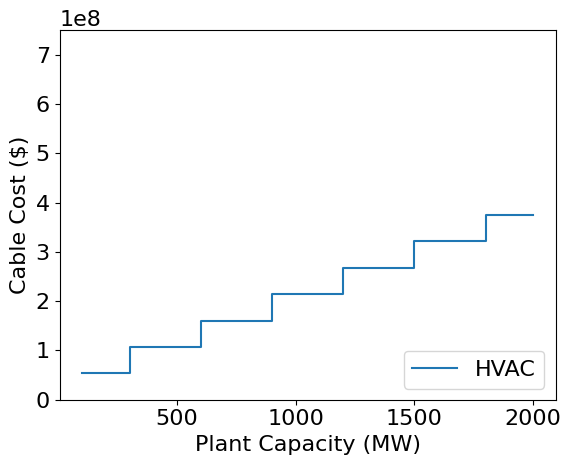

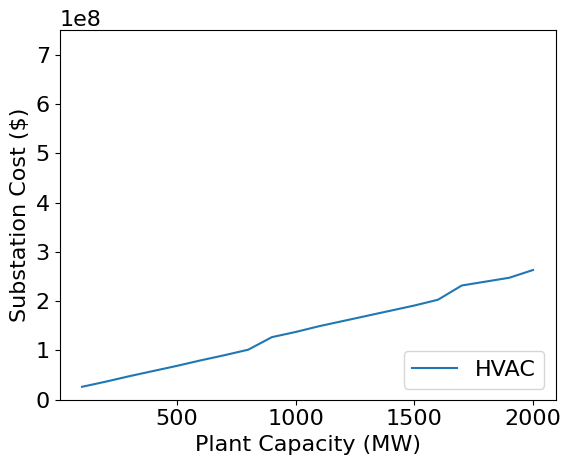

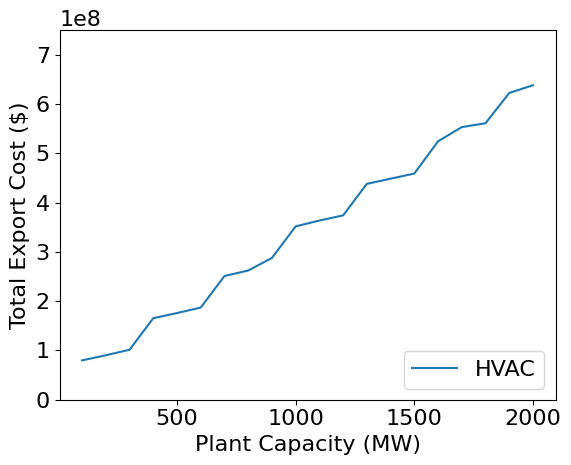

In [29]:
# number per line = total / 4
# 0 - (num-1), num - (2num-1), etc 
# 
num = int(len(parametric.results) / 2)
print(num)

sub_cost = parametric.results.oss_cost * parametric.results.num_substations

index = 3
# Cable Cost
plt.step(np.arange(100,2100,100), parametric.results.cable_cost[0+20*index:20*(index+1)])
# plt.plot(np.arange(100,2100,100), parametric.results.cable_cost[num+20*index:num+20*(index+1)])

plt.legend(["HVAC","HVDC"], loc = "lower right")
plt.ylabel("Cable Cost ($)")
plt.xlabel("Plant Capacity (MW)")
plt.ylim([0,7.5e8])
plt.show()

# Substation Cost
plt.plot(np.arange(100,2100,100), sub_cost[0+20*index:20*(index+1)])
# plt.plot(np.arange(100,2100,100), parametric.results.oss_cost[num+20*index:num+20*(index+1)])

plt.legend(["HVAC","HVDC"], loc = "lower right")
plt.ylabel("Substation Cost ($)")
plt.xlabel("Plant Capacity (MW)")
plt.ylim([0,7.5e8])
plt.show()

#Total Export System Cost
total_cost = sub_cost + parametric.results.cable_cost
plt.plot(np.arange(100,2100,100), total_cost[0+20*index:20*(index+1)])
# plt.plot(np.arange(100,2100,100), total_cost[num+20*index:num+20*(index+1)])

plt.legend(["HVAC","HVDC"], loc = "lower right")
plt.ylabel("Total Export Cost ($)")
plt.xlabel("Plant Capacity (MW)")
plt.ylim([0,7.5e8])
plt.rcParams.update({'font.size':16})
plt.show()


# Varying distance to shore for given plant capacity

20


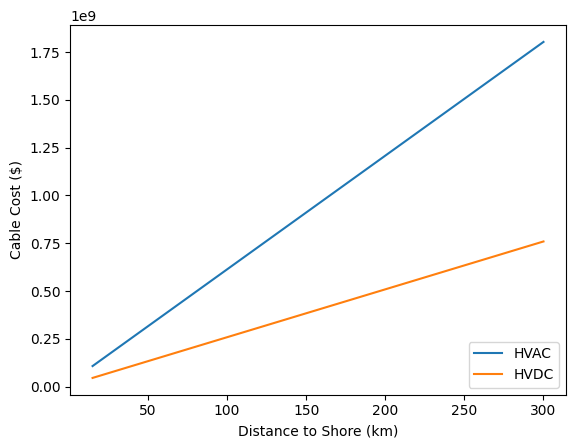

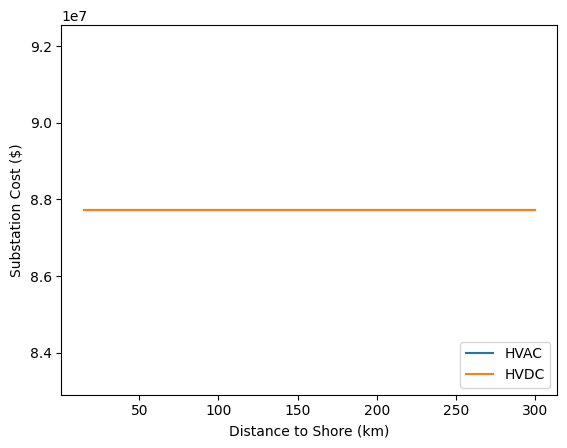

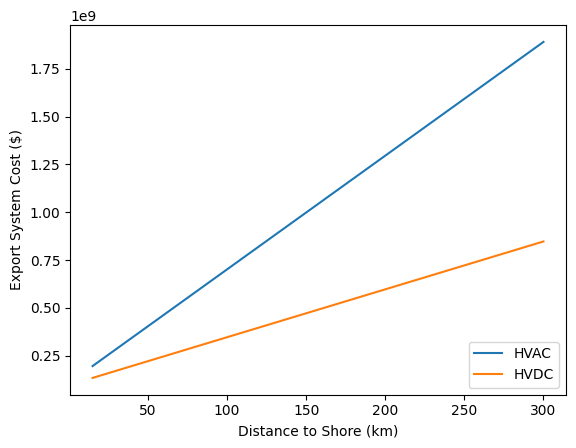

In [7]:
cable_vec = np.zeros((40,20))
oss_vec = np.zeros((40,20))
total_vec = np.zeros((40,20))
num2 = int(len(cable_vec) / 2)
print(num2)
for i in np.arange(20):
    for j in np.arange(40):
        index = 20 * j + i 
        cable_vec[j,i] = parametric.results.cable_cost[index]
        oss_vec[j,i] = parametric.results.oss_cost[index]
        total_vec[j,i] = parametric.results.cable_cost[index] + parametric.results.oss_cost[index]

ind = 19
# Cable Cost
plt.plot(np.arange(15,315,15), cable_vec[0:num2,ind])
plt.plot(np.arange(15,315,15), cable_vec[num2:40,ind])

plt.legend(["HVAC","HVDC"], loc = "lower right")
plt.xlabel("Distance to Shore (km)")
plt.ylabel("Cable Cost ($)")
plt.show()

# Substation Cost
plt.plot(np.arange(15,315,15), oss_vec[0:num2,ind])
plt.plot(np.arange(15,315,15), oss_vec[num2:40,ind])

plt.legend(["HVAC","HVDC"], loc = "lower right")
plt.ylabel("Substation Cost ($)")
plt.xlabel("Distance to Shore (km)")
plt.show()

# Total Export System Cost
plt.plot(np.arange(15,315,15), total_vec[0:num2,ind])
plt.plot(np.arange(15,315,15), total_vec[num2:40,ind])

plt.legend(["HVAC","HVDC"], loc = "lower right")
plt.ylabel("Export System Cost ($)")
plt.xlabel("Distance to Shore (km)")
plt.show()

# Contour for which is cheaper

In [68]:
cable_vec_ac = np.zeros((20,20))
oss_vec_ac = np.zeros((20,20))
total_vec_ac = np.zeros((20,20))
# dist = np.zeros((20,20))

for i in np.arange(20):
    for j in np.arange(20):
        index = 20 * j + i 
        cable_vec_ac[j,i] = parametric.results.cable_cost[index]
        oss_vec_ac[j,i] = parametric.results.oss_cost[index] * parametric.results.num_substations[index]
        total_vec_ac[j,i] = parametric.results.cable_cost[index] + oss_vec_ac[j,i]
#         dist[j,i] = parameters.site.distance_to_landfall[index]



# plt.colormap

In [69]:
cable_vec_dc = np.zeros((20,20))
oss_vec_dc = np.zeros((20,20))
total_vec_dc = np.zeros((20,20))
# dist = np.zeros((20,20))

for i in np.arange(20):
    for j in np.arange(20):
        index = 20 * j + i + 400
        cable_vec_dc[j,i] = parametric.results.cable_cost[index]
        oss_vec_dc[j,i] = parametric.results.oss_cost[index] * parametric.results.num_substations[index]
        total_vec_dc[j,i] = parametric.results.cable_cost[index] + oss_vec_dc[j,i]
#         dist[j,i] = parameters.site.distance_to_landfall[index]


In [70]:
contour_binary = np.ones((20,20))
for i in np.arange(20):
    for j in np.arange(20):
        if total_vec_dc[j,i] < total_vec_ac[j,i]:
            contour_binary[j,i] = 0

In [71]:
cmap = LinearSegmentedColormap.from_list('custom_div_cmap',['#d73027', '#ffffbf','#1a9641'], 2)

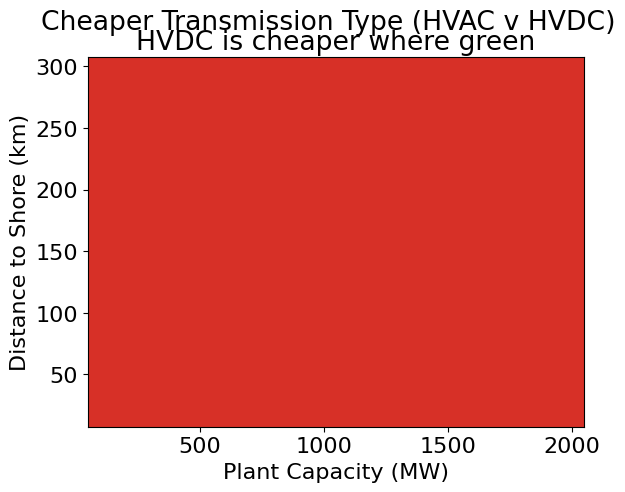

In [72]:
plt.pcolormesh(np.arange(100,2100,100), np.arange(15,315,15),contour_binary, cmap=cmap, shading='auto')
# plt.colorbar()
plt.xlabel('Plant Capacity (MW)')
plt.ylabel('Distance to Shore (km)')
plt.title('HVDC is cheaper where green')
plt.suptitle('Cheaper Transmission Type (HVAC v HVDC)')
plt.show()

In [64]:
contour_cost = np.zeros((20,20))
for i in np.arange(20):
    for j in np.arange(20):
        if total_vec_dc[j,i] > total_vec_ac[j,i]:
            contour_cost[j,i] = total_vec_ac[j,i]
        else: 
            contour_cost[j,i] = total_vec_dc[j,i]


# Color Map of Total Cost of Cheaper Option

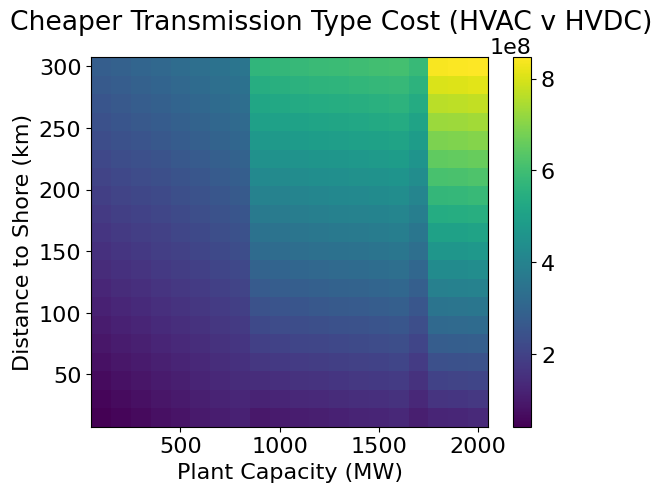

In [45]:
plt.pcolormesh(np.arange(100,2100,100), np.arange(15,315,15),contour_cost, shading='auto')
plt.colorbar()
plt.xlabel('Plant Capacity (MW)')
plt.ylabel('Distance to Shore (km)')
# plt.title('HVDC is cheaper where green')
plt.suptitle('Cheaper Transmission Type Cost (HVAC v HVDC)')
plt.show()

# Overall Bar Chart

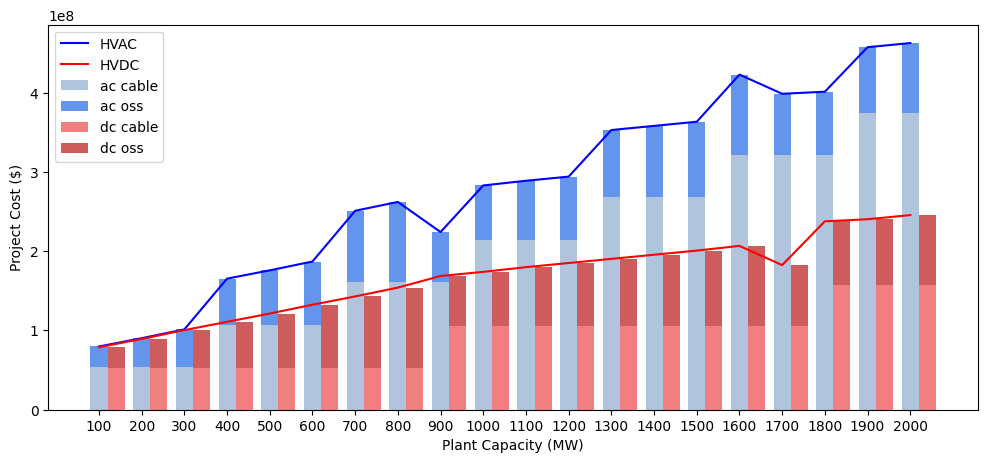

In [15]:
ind = np.arange(0,20)
index = 3
width = 0.4
plt.figure(figsize=(12,5))
plant_cap = np.arange(100,2100,100)

cable_data_ac = parametric.results.cable_cost[20*index:20*(index+1)]
# print(len(parametric.results.cable_cost[20*index:20*(index+1)]))
substation_data_ac = parametric.results.oss_cost[20*index:20*(index+1)]
plt.bar(ind,cable_data_ac, width, label = 'ac cable', color = 'lightsteelblue')
plt.bar(ind,substation_data_ac, width, label = 'ac oss', color = 'cornflowerblue', bottom = cable_data_ac)

cable_data_dc = parametric.results.cable_cost[num+20*index:num+20*(index+1)]
substation_data_dc = parametric.results.oss_cost[num+20*index:num+20*(index+1)]
plt.bar(ind+width, cable_data_dc, width, label = 'dc cable', color = 'lightcoral')
plt.bar(ind+width, substation_data_dc, width, label = 'dc oss', color = 'indianred', bottom = cable_data_dc)
plant_cap_str = np.char.mod('%d',plant_cap)
# print(plant_cap)

total_cost = parametric.results.oss_cost + parametric.results.cable_cost
plt.plot(ind, total_cost[0+20*index:20*(index+1)], color = 'blue', label = 'HVAC')
plt.plot(ind, total_cost[num+20*index:num+20*(index+1)], color = 'red', label = 'HVDC')

plt.xticks(ind,plant_cap_str)
plt.legend(loc = 'upper left')
plt.ylabel("Project Cost ($)")
plt.xlabel("Plant Capacity (MW)")
plt.show()
